In [1]:
# import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

*Mengimpor library yang diperlukan, termasuk Pandas untuk manipulasi data, Seaborn untuk visualisasi data, dan Matplotlib untuk plotting*

In [2]:
# baca dataset
df = pd.read_csv('K03_counter_strike_2.csv', delimiter=',')
df.sample(5)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,round_winner
1409,34.96,5.0,7.0,de_mirage,False,400.0,456.0,398.0,416.0,2900.0,27900.0,4.0,5.0,T
1848,114.95,14.0,12.0,de_mirage,False,500.0,500.0,496.0,500.0,2250.0,17050.0,4.0,5.0,T
765,174.95,9.0,9.0,de_inferno,False,500.0,500.0,99.0,322.0,11200.0,28450.0,1.0,4.0,T
1634,114.93,13.0,5.0,de_vertigo,False,500.0,500.0,387.0,200.0,2400.0,11200.0,4.0,0.0,CT
1132,49.02,13.0,6.0,de_overpass,False,100.0,45.0,100.0,89.0,2250.0,650.0,1.0,1.0,CT


*Membaca file CSV ('K03_counter_strike_2.csv') ke dalam DataFrame Pandas yang disebut df*

In [3]:
# Loop untuk melihat nilai unik di setiap kolom kategorikal
for kolom in df.select_dtypes(include=['object']):
    unique_values = df[kolom].value_counts()
    print(f"Nilai unik dalam kolom '{kolom}':\n{unique_values}\n")

Nilai unik dalam kolom 'map':
de_mirage      553
de_nuke        509
de_dust2       302
de_inferno     183
de_overpass    172
de_vertigo     155
de_train       126
Name: map, dtype: int64

Nilai unik dalam kolom 'round_winner':
T     1176
CT     824
Name: round_winner, dtype: int64



*Menampilkan 5 sampel acak dari dataset untuk memberikan gambaran cepat tentang datanya
Menampilkan nilai unik dalam kolom-kolom yang berjenis data objek*

In [4]:
df.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,95.630205,6.840000,6.28850,406.170500,402.987500,306.749000,309.54450,7867.350000,12377.600000,1.821500,3.009500
std,53.734491,4.233599,4.19059,137.616258,137.699186,172.857221,168.68957,9017.491838,12209.581798,1.774884,1.960952
min,0.050000,0.000000,0.00000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,54.910000,3.000000,3.00000,315.750000,328.750000,188.000000,190.00000,1200.000000,1700.000000,0.000000,1.000000
50%,94.910000,7.000000,6.00000,500.000000,500.000000,300.000000,362.00000,4000.000000,9075.000000,1.000000,4.000000
75%,156.425000,10.000000,10.00000,500.000000,500.000000,488.000000,467.00000,11762.500000,19250.000000,3.000000,5.000000
max,175.000000,15.000000,15.00000,500.000000,500.000000,500.000000,500.00000,58050.000000,67700.000000,5.000000,5.000000


*Menyajikan statistik deskriptif dari dataset, termasuk count, mean, std (standar deviasi), min, 25%, 50%, 75%, dan max*

In [5]:
# data preprocessing

# cek null value
df.isnull().sum()

time_left       0
ct_score        0
t_score         0
map             0
bomb_planted    0
ct_health       0
t_health        0
ct_armor        0
t_armor         0
ct_money        0
t_money         0
ct_helmets      0
t_helmets       0
round_winner    0
dtype: int64

*Mengecek nilai null dalam dataset dan mencetak jumlah nilai null untuk setiap kolom*

In [6]:
print("Jumlah data duplikasi: ", df.duplicated().sum())

Jumlah data duplikasi:  39


*Mengecek jumlah data duplikasi dalam dataset*

In [7]:
# Hapus data duplikat
df = df.drop_duplicates()

# cek kembali
print("Jumlah data duplikasi: ", df.duplicated().sum())

Jumlah data duplikasi:  0


*Menghapus data duplikasi dan kembali memeriksa jumlah data duplikasi*

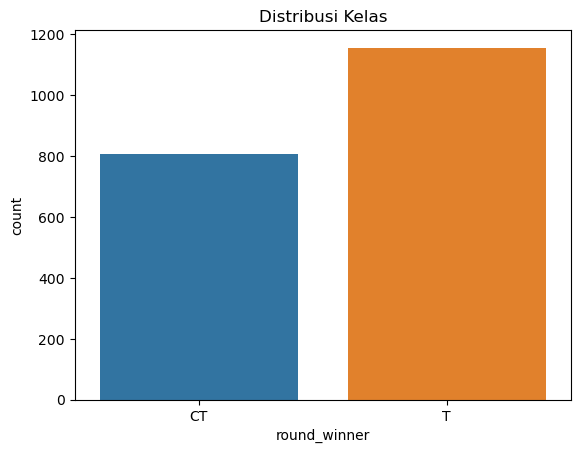

In [9]:
# lihat distribusi data
sns.countplot(x='round_winner', data=df)
plt.title('Distribusi Kelas')
plt.show()

*Menampilkan diagram batang untuk menunjukkan distribusi kelas pada kolom 'round_winner'*

In [11]:
from sklearn.preprocessing import LabelEncoder

# Lakukan encoding pada kolom 'map', 'bomb_planted', dan 'round_winner' untuk mengubah menjadi data numerik
label_encoder = LabelEncoder()

df['bomb_planted'] = label_encoder.fit_transform(df['bomb_planted'])
df['map'] = label_encoder.fit_transform(df['map'])
df['round_winner'] = label_encoder.fit_transform(df['round_winner'])

df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,round_winner
0,175.00,0.0,0.0,0,0,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0
1,156.03,0.0,0.0,0,0,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,0
2,96.03,0.0,0.0,0,0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,0
3,76.03,0.0,0.0,0,0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,0
4,174.97,1.0,0.0,0,0,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,0


*Menggunakan Label Encoder untuk mengubah data kategori menjadi angka pada kolom 'bomb_planted', 'map', dan 'round_winner'*

In [13]:
# tampilkan korelasi hubungan fitur dengan target
corr = df.corr()
corr

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,round_winner
time_left,1.000000,0.018958,0.005849,0.017648,-0.525688,0.687948,0.667982,-0.065676,-0.158998,0.499833,0.385060,-0.058911,-0.179259,-0.065547
ct_score,0.018958,1.000000,0.683363,0.035121,-0.036623,0.046074,0.056730,0.031596,0.101341,-0.004403,0.121010,0.033221,0.128153,0.053773
t_score,0.005849,0.683363,1.000000,-0.138196,-0.016682,-0.009658,0.027726,-0.031375,0.140837,-0.145254,0.337850,-0.168195,0.191946,0.108331
map,0.017648,0.035121,-0.138196,1.000000,-0.021206,0.010332,-0.022541,0.014489,-0.057022,0.058517,-0.048430,0.053201,-0.066924,-0.068484
bomb_planted,-0.525688,-0.036623,-0.016682,-0.021206,1.000000,-0.622723,-0.468723,-0.296200,-0.102722,-0.202831,-0.142479,-0.162054,-0.061268,0.174248
ct_health,0.687948,0.046074,-0.009658,0.010332,-0.622723,1.000000,0.758848,0.427477,0.183383,0.340749,0.230376,0.256234,0.111915,-0.179735
t_health,0.667982,0.056730,0.027726,-0.022541,-0.468723,0.758848,1.000000,0.211146,0.387381,0.308651,0.334668,0.115722,0.309131,0.104112
ct_armor,-0.065676,0.031596,-0.031375,0.014489,-0.296200,0.427477,0.211146,1.000000,0.316688,-0.173477,-0.170596,0.649642,0.240603,-0.299646
t_armor,-0.158998,0.101341,0.140837,-0.057022,-0.102722,0.183383,0.387381,0.316688,1.000000,-0.224511,-0.011470,0.137167,0.910263,0.357391
ct_money,0.499833,-0.004403,-0.145254,0.058517,-0.202831,0.340749,0.308651,-0.173477,-0.224511,1.000000,0.316186,0.135642,-0.163283,-0.068889


In [14]:
# melihat korelasi fitur dan target
df_corr = corr['round_winner']  

# urutkan hasil korelasi
sorted_feature = df_corr.abs().sort_values(ascending=False)
print(sorted_feature)

round_winner    1.000000
t_helmets       0.377305
t_armor         0.357391
ct_armor        0.299646
ct_helmets      0.187766
ct_health       0.179735
bomb_planted    0.174248
t_money         0.170209
t_score         0.108331
t_health        0.104112
ct_money        0.068889
map             0.068484
time_left       0.065547
ct_score        0.053773
Name: round_winner, dtype: float64


*Menghitung korelasi antar fitur dan menampilkan fitur yang paling berkorelasi dengan 'round_winner'*

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB

# Pisahkan fitur dengan target
X = df.iloc[:, 0:13]
y = df.iloc[:, 13]

# Bagi data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*Memisahkan data menjadi data pelatihan dan pengujian, lalu membuat dan melatih model Naive Bayes menggunakan GaussianNB*

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.68      0.73       170
           1       0.78      0.87      0.82       223

    accuracy                           0.78       393
   macro avg       0.79      0.77      0.77       393
weighted avg       0.78      0.78      0.78       393

Confusion Matrix:
[[115  55]
 [ 30 193]]


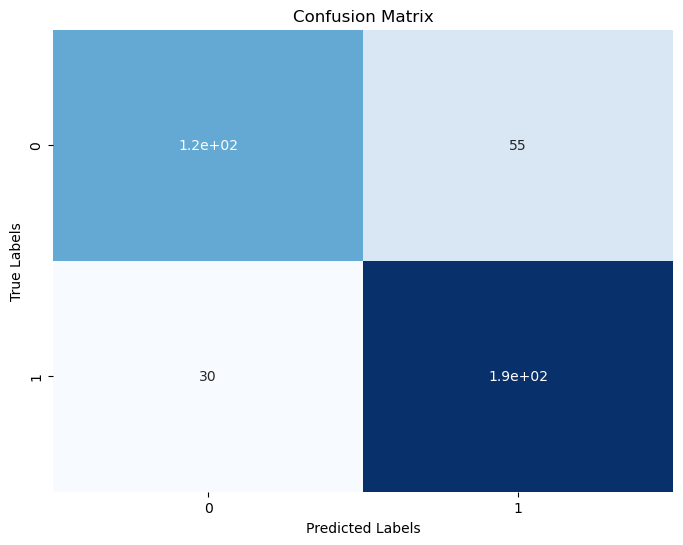

In [35]:
# Inisialisasi model Naive Bayes Multinomial
nb_model = GaussianNB()

# Latih model
nb_model.fit(X_train, y_train)

# Prediksi model pada data test
test_predictions = nb_model.predict(X_test)

# Evaluasi performa model pada data test
classification_report_result = classification_report(y_test, test_predictions)
print("Classification Report:\n", classification_report_result)

# Cetak confusion matrix pada data test
confusion_mat = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(confusion_mat)

# Mencetak confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [37]:
# Ambil contoh 10 data tes untuk diuji
X_test_subset = X_test.sample(10)

# prediksi pada data tes
y_pred_head = nb_model.predict(X_test_subset)

predict_df = pd.DataFrame({
    'Features': X_test_subset.values.tolist(),
    'Class': y_test.head(10).values,
    'Predicted': y_pred_head
})

predict_df

,Features,Class,Predicted
0,"[174.91, 14.0, 6.0, 4.0, 0.0, 500.0, 500.0, 10...",0,0
1,"[14.96, 5.0, 7.0, 2.0, 0.0, 200.0, 256.0, 199....",0,1
2,"[11.41, 4.0, 3.0, 2.0, 1.0, 200.0, 365.0, 197....",1,1
3,"[69.95, 8.0, 6.0, 2.0, 0.0, 500.0, 400.0, 500....",1,1
4,"[94.92, 12.0, 9.0, 2.0, 0.0, 300.0, 470.0, 100...",0,1
5,"[94.95, 0.0, 0.0, 2.0, 0.0, 500.0, 357.0, 400....",1,0
6,"[107.03, 5.0, 3.0, 3.0, 0.0, 500.0, 500.0, 498...",0,0
7,"[15.09, 14.0, 12.0, 2.0, 1.0, 257.0, 0.0, 265....",0,0
8,"[66.98, 12.0, 10.0, 0.0, 0.0, 243.0, 234.0, 30...",0,1
9,"[174.91, 9.0, 1.0, 5.0, 0.0, 500.0, 500.0, 300...",0,0


*Menampilkan matriks kebingungan (confusion matrix) menggunakan heatmap
Mengambil 10 data tes acak dan memprediksi labelnya menggunakan model Naive Bayes, lalu menampilkan hasil prediksi dan kelas aktual*